In [50]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

In [33]:
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")

In [34]:
category = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
            "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
            "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
            "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]

In [35]:
labels = train_df["SalePrice"].copy()
train_df = train_df.drop(["Id", "SalePrice"], axis=1)
train_num = train_df[category].copy()
train_cat = train_df.drop(category, axis=1)

In [36]:
ids = test_df["Id"].copy()
test_df = test_df.drop(["Id"], axis=1)
test_num = test_df[category].copy()
test_cat = test_df.drop(category, axis=1)

In [37]:
imputer = SimpleImputer(strategy="median")
scalar = StandardScaler()
X = imputer.fit_transform(train_num)
X = scalar.fit_transform(X)
train_num = pd.DataFrame(X, columns=train_num.columns)
train_num.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,2.798370e-16,-5.840077e-17,-3.893385e-17,-2.433366e-17,-3.406712e-17,-6.600504e-17,2.457699e-16,6.509253e-17,-1.825024e-17,1.216683e-17,-1.277517e-16,-1.216683e-17,5.596741e-17,3.041707e-17,-2.311697e-17,4.866731e-18,5.475072e-17,1.946692e-17,-2.676702e-17
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-2.219047e+00,-9.237292e-01,-5.707501e-01,-9.730182e-01,-2.886528e-01,-1.284176e+00,-2.411167e+00,-2.144172e+00,-7.951632e-01,-1.202417e-01,-2.249120e+00,-2.212963e+00,-7.521758e-01,-7.044833e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02
25%,-4.479400e-01,-2.969908e-01,-5.707501e-01,-9.730182e-01,-2.886528e-01,-7.793259e-01,-5.966855e-01,-7.261556e-01,-7.951632e-01,-1.202417e-01,-7.347485e-01,-6.479160e-01,-7.521758e-01,-7.044833e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02
50%,-3.922314e-02,-1.040633e-01,-5.707501e-01,-1.319022e-01,-2.886528e-01,-2.031633e-01,-1.503334e-01,-1.956933e-01,-7.951632e-01,-1.202417e-01,-9.797004e-02,3.284429e-02,-7.521758e-01,-3.270298e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02
75%,4.149067e-01,1.087080e-01,3.383686e-01,5.891327e-01,-2.886528e-01,5.450557e-01,5.491227e-01,5.915905e-01,8.731117e-01,-1.202417e-01,4.974036e-01,4.820057e-01,5.886506e-01,3.221901e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02
max,1.104155e+01,2.051827e+01,8.285201e+00,1.140575e+01,8.851638e+00,4.004295e+00,1.152095e+01,9.132681e+00,3.936963e+00,1.164775e+01,7.855574e+00,4.421526e+00,6.087635e+00,7.554198e+00,8.675309e+00,1.721723e+01,8.341462e+00,1.830618e+01,3.116527e+01


In [38]:
X = imputer.transform(test_num)
X = scalar.transform(X)
test_num = pd.DataFrame(X, columns=test_num.columns)
test_num.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,-0.055315,-0.069922,-0.019059,-0.009813,0.037417,-0.029426,-0.025878,-0.015764,-0.048180,-0.047339,-0.056002,-0.000965,-0.008538,0.024967,0.037468,-0.055113,0.035944,-0.025261,0.029597
std,0.933772,0.496652,0.979700,0.998185,1.095710,0.989585,1.009563,1.030302,0.963865,0.906120,0.924359,1.015172,1.019546,1.040011,1.100323,0.689516,1.015635,0.759187,1.271909
min,-2.219047,-0.906691,-0.570750,-0.973018,-0.288653,-1.284176,-2.411167,-1.955276,-0.795163,-0.120242,-2.110152,-2.212963,-0.752176,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
25%,-0.447940,-0.313277,-0.570750,-0.973018,-0.288653,-0.787250,-0.623478,-0.748150,-0.795163,-0.120242,-0.757593,-0.725116,-0.752176,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
50%,-0.039223,-0.112031,-0.570750,-0.203183,-0.288653,-0.242782,-0.158314,-0.216394,-0.795163,-0.120242,-0.158888,0.032844,-0.752176,-0.281735,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
75%,0.369494,0.100289,0.325915,0.676315,-0.288653,0.521285,0.562234,0.568949,0.753949,-0.120242,0.391274,0.482006,0.588651,0.382583,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
max,5.909878,4.618549,6.569361,7.821963,9.174090,3.560571,9.206531,10.175493,3.471771,21.769868,6.814265,4.749040,10.612924,10.498335,16.204171,12.167294,10.063796,19.849869,34.189748


In [39]:
train_cat_str = train_cat.select_dtypes(include="object")
train_cat_str = train_cat_str.fillna("NA")
train_cat_int = train_cat.select_dtypes(exclude="object")

second_imp = SimpleImputer(strategy="median")
X = second_imp.fit_transform(train_cat_int)
train_cat_int = pd.DataFrame(X, columns=train_cat_int.columns)

train_cat = pd.concat([train_cat_str, train_cat_int], axis=1)
train_cat.describe()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,6.099315,5.575342,1971.267808,1984.865753,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,6.321918,2007.815753
std,42.300571,1.382997,1.112799,30.202904,20.645407,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,2.703626,1.328095
min,20.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,1.000000,2006.000000
25%,20.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,5.000000,2007.000000
50%,50.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,6.000000,2008.000000
75%,70.000000,7.000000,6.000000,2000.000000,2004.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,8.000000,2009.000000
max,190.000000,10.000000,9.000000,2010.000000,2010.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,12.000000,2010.000000


In [40]:
test_cat_str = test_cat.select_dtypes(include="object")
test_cat_str = test_cat_str.fillna("NA")
test_cat_int = test_cat.select_dtypes(exclude="object")


X = second_imp.transform(test_cat_int)
test_cat_int = pd.DataFrame(X, columns=test_cat_int.columns)

test_cat = pd.concat([test_cat_str, test_cat_int], axis=1)
test_cat.describe()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,MoSold,YrSold
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,6.078821,5.553804,1971.357779,1983.662783,0.433859,0.065113,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.843043,1.766278,6.104181,2007.769705
std,42.746880,1.436812,1.113740,30.390071,21.130467,0.530527,0.252307,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,25.719563,0.775703,2.722432,1.301740
min,20.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,1.000000,2006.000000
25%,20.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1960.500000,1.000000,4.000000,2007.000000
50%,50.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1980.000000,2.000000,6.000000,2008.000000
75%,70.000000,7.000000,6.000000,2001.000000,2004.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2001.000000,2.000000,8.000000,2009.000000
max,190.000000,10.000000,9.000000,2010.000000,2010.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,12.000000,2010.000000


In [41]:
encoder = OneHotEncoder(handle_unknown='ignore')
X = encoder.fit_transform(train_cat)
train_cat = pd.DataFrame(X.toarray())

In [42]:
X = encoder.transform(test_cat)
test_cat = pd.DataFrame(X.toarray())

In [43]:
houses_train = pd.concat([train_num, train_cat], axis=1)
houses_train.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,626,627,628,629,630,631,632,633,634,635
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,2.798370e-16,-5.840077e-17,-3.893385e-17,-2.433366e-17,-3.406712e-17,-6.600504e-17,2.457699e-16,6.509253e-17,-1.825024e-17,1.216683e-17,...,0.083562,0.043151,0.060959,0.054110,0.040411,0.215068,0.225342,0.208219,0.231507,0.119863
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,0.276824,0.203266,0.239337,0.226311,0.196989,0.411011,0.417951,0.406174,0.421940,0.324913
min,-2.219047e+00,-9.237292e-01,-5.707501e-01,-9.730182e-01,-2.886528e-01,-1.284176e+00,-2.411167e+00,-2.144172e+00,-7.951632e-01,-1.202417e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.479400e-01,-2.969908e-01,-5.707501e-01,-9.730182e-01,-2.886528e-01,-7.793259e-01,-5.966855e-01,-7.261556e-01,-7.951632e-01,-1.202417e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.922314e-02,-1.040633e-01,-5.707501e-01,-1.319022e-01,-2.886528e-01,-2.031633e-01,-1.503334e-01,-1.956933e-01,-7.951632e-01,-1.202417e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.149067e-01,1.087080e-01,3.383686e-01,5.891327e-01,-2.886528e-01,5.450557e-01,5.491227e-01,5.915905e-01,8.731117e-01,-1.202417e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.104155e+01,2.051827e+01,8.285201e+00,1.140575e+01,8.851638e+00,4.004295e+00,1.152095e+01,9.132681e+00,3.936963e+00,1.164775e+01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
houses_test = pd.concat([test_num, test_cat], axis=1)

In [46]:
model = Sequential()
model.add(tf.keras.Input(shape=(houses_train.shape[1],)))
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(1000, activation='relu'))
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='relu'))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-03-06 15:34:23.607605: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-06 15:34:23.607723: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [48]:
model.compile(loss="mean_squared_error",
              optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [49]:
history = model.fit(houses_train, labels, epochs=500, batch_size=16)

Epoch 1/500


2023-03-06 15:36:20.509612: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-06 15:36:20.695229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


92/92 [==============================] - 3s 11ms/step - loss: 37333430272.0000 - root_mean_squared_error: 193218.6094
Epoch 2/500
92/92 [==============================] - 1s 8ms/step - loss: 10571565056.0000 - root_mean_squared_error: 102818.1172
Epoch 3/500
92/92 [==============================] - 1s 8ms/step - loss: 2701164288.0000 - root_mean_squared_error: 51972.7266
Epoch 4/500
92/92 [==============================] - 1s 8ms/step - loss: 1754076416.0000 - root_mean_squared_error: 41881.6953
Epoch 5/500
92/92 [==============================] - 1s 9ms/step - loss: 1440943872.0000 - root_mean_squared_error: 37959.7656
Epoch 6/500
92/92 [==============================] - 1s 8ms/step - loss: 1277377664.0000 - root_mean_squared_error: 35740.4219
Epoch 7/500
92/92 [==============================] - 1s 9ms/step - loss: 1155819904.0000 - root_mean_squared_error: 33997.3516
Epoch 8/500
92/92 [==============================] - 1s 8ms/step - loss: 1083317504.0000 - root_mean_squared_error: 32

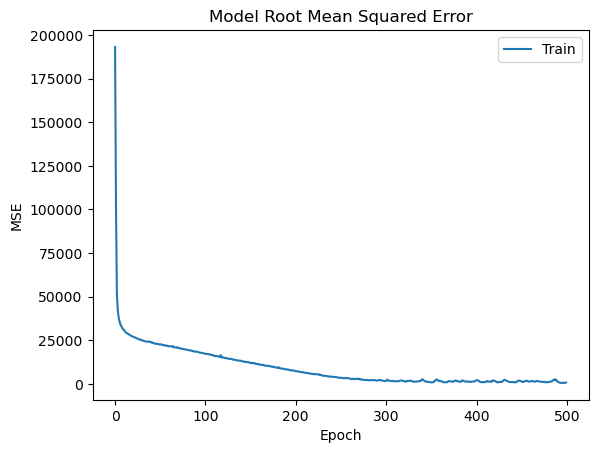

In [51]:
plt.plot(history.history['root_mean_squared_error'])
plt.title('Model Root Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train'])
plt.show()

In [60]:
output = model.predict(houses_test)
output = pd.DataFrame(output, columns=["SalePrice"])
prediction = pd.concat([ids, output], axis=1)

46/46 [==============================] - 0s 3ms/step


In [62]:
prediction.to_csv("./pred.csv", index=False)